Data provided was stored in conn.csv, theme customization is included. First case displays full timestamp as requested using date_format function from mizani (https://mizani.readthedocs.io/en/stable/formatters.html#mizani.formatters.date_format). to_period function is used to extract and add  month_year column used to perform aggregation. geom_point used due to lack of information.

In [3]:
from plotnine import *
import pandas as pd
from mizani.formatters import date_format

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


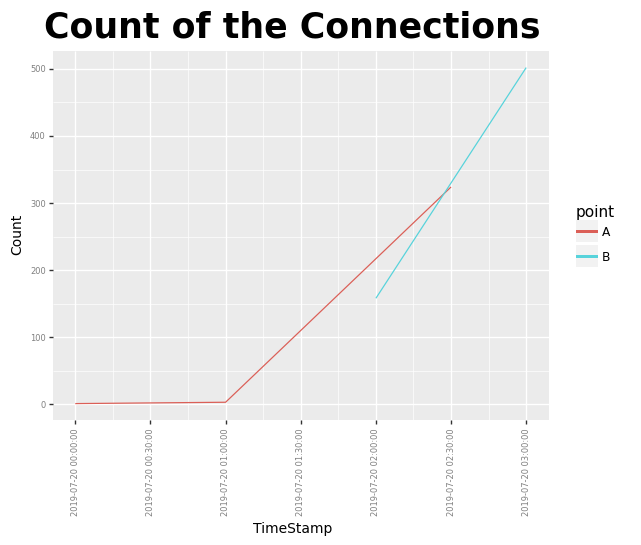

<ggplot: (137223999034)>

In [4]:
df = pd.read_csv('conn.csv', parse_dates=[1])
custom_axis = theme(axis_text_x = element_text(color="grey", size=6, angle=90, hjust=.3),
                    axis_text_y = element_text(color="grey", size=6), 
                    plot_title = element_text(size = 25, face = "bold"), 
                    axis_title = element_text(size = 10)  
                    ) 

(
    ggplot(data = df, mapping = aes(x='timestamp_local', y='0', group="point", color="point")) + 
    geom_line(stat="identity") + custom_axis + ylab("Count") + xlab("TimeStamp") + labs(title="Count of the Connections") +
    scale_x_datetime(labels = date_format("%Y-%m-%d %H:%M:%S"))
)

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


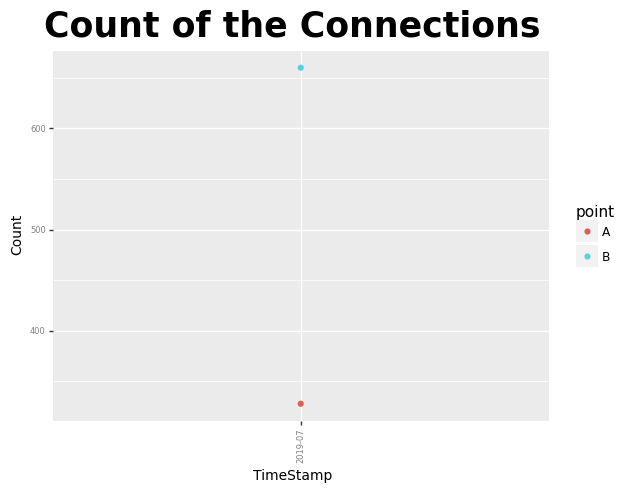

<ggplot: (137224036328)>

In [5]:
df['month_year'] = pd.to_datetime(df['timestamp_local']).dt.to_period('M')
df = df.groupby(['point', 'month_year']).sum().reset_index()
(
    ggplot(data = df, mapping = aes(x='month_year', y='0', group="point", color="point")) + 
    geom_point() + custom_axis + ylab("Count") + xlab("TimeStamp") + labs(title="Count of the Connections") 
)
